# E-Commerce Project 
## Project Task: Week 1
### Step-1: Perform an EDA on the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv(r"train_data.csv")
df_train.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive


#### Step-1a: See what a positive, negative, and neutral review looks like

In [3]:
for row in df_train[5:10].itertuples():
    _,_,_,_,_,_,text,_,sentiment = row
    print(f"Sentiment : {sentiment}")
    print(f"Text : {text}")
    print("-----------------------------------------\n")

Sentiment : Positive
Text : This is a great product. Light weight. I wish it has wifi to download from online.
-----------------------------------------

Sentiment : Neutral
Text : My 7-year old daughter saved up to by this. Her brother bought the 8GB about a year earlier, so new she needed more space. The OS is a bit clunky, and less intuitive then on higher priced tablets, but tough to beat the price. Speed isn't great for web or certain gaming apps, but fine for books. Parental controls are helpful, but take time to figure out and require more steps than seem necessary to change. Overall, OK first tablet for kids, considering the price. For adults, fine for e-books and VERY basic apps. Otherwise, best to pay up for better quality and OS efficiency.
-----------------------------------------

Sentiment : Positive
Text : Purchased this for my son. Has room to upgrade memory to allow more books & games. But the speakers could be better or located in a better position.
------------------

To visualize in general, let's print word cloud for all three positive, neagtive and neutral and let's see how they looks like. 

In [4]:
positive = df_train.loc[df_train["sentiment"]=="Positive"].reset_index(drop=True)
negative = df_train.loc[df_train["sentiment"]=="Negative"].reset_index(drop=True)
neutral = df_train.loc[df_train["sentiment"]=="Neutral"].reset_index(drop=True)

In [5]:
# importing necessary libraries
from wordcloud import WordCloud, ImageColorGenerator

Printing wordcloud for positive sentences.

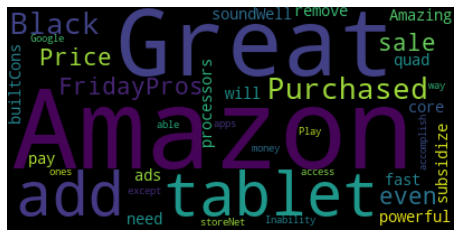

In [6]:
text = positive["reviews.text"][0]
# create and generate word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

Word cloud for negative sentences.

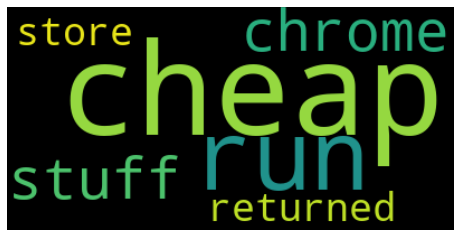

In [7]:
text_neg = negative["reviews.text"][0]
# create and generate word cloud image
wordcloud_1 = WordCloud().generate(text_neg)

# Display the generated image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_1,interpolation="bilinear")
plt.axis("off")
plt.show()

Printing wordcloud for neutral sentences.

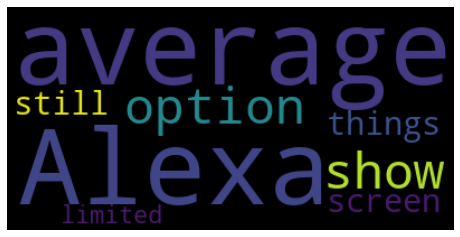

In [8]:
text_neu = neutral["reviews.text"][0]
# create and generate word cloud image
wordcloud_2 = WordCloud().generate(text_neu)

# Display the generated image
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_2,interpolation="bilinear")
plt.axis("off")
plt.show()

#### Step-1b: Check the class count for each class. It’s a class imbalance problem.

Since it is written that dataset is imbalanced dataset. Let's look at those classes.

In [9]:
# Check the dataset 
df_train["sentiment"].value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

As clearly the data is given as unbalanced data as also mentioned in the data description of the project. Let's check this by plotting a graph.

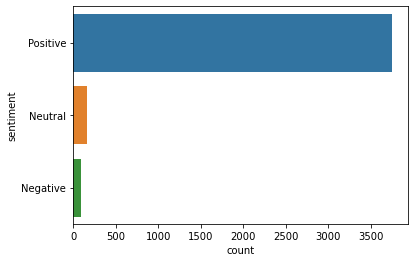

In [10]:
sns.countplot(y="sentiment",data=df_train)
plt.show()

In [11]:
# Checking for presence of any null value
df_train.isna().sum()

name                  0
brand                 0
categories            0
primaryCategories     0
reviews.date          0
reviews.text          0
reviews.title        10
sentiment             0
dtype: int64

We are only intersted in here the review text and sentiment. So, we will make a separate list for these two variables.

In [12]:
text = df_train["reviews.text"].to_numpy()
sentiment = df_train["sentiment"].to_numpy()

In [13]:
text[:5]

array(['Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ads, Amazon need this to subsidize the tablet and will remove the adds if you pay them $15.Inability to access other apps except the ones from Amazon. There is a way which I was able to accomplish to add the Google Play storeNet this is a great tablet for the money',
       'I purchased two Amazon in Echo Plus and two dots plus four fire sticks and the hub Philips hue for lamp for the family at Christmas 2017. I‚Äôm so happy with these purchases and learning so much with Alexa. You can start your daily routine with Alexa and program it to whatever you would like to include news weather music horoscope ALSO you can start your day off with a compliment and I think is very important. Alexa gave me the BEST CHILI RECIPE I MEAN THE BEST it‚Äôs called Chili I. I want my husband to use Alexa to stay organized for business dates and reminders. 

Now we will lower the whole of the sentences.

In [14]:
sentences = [text_lower.lower() for text_lower in text]

In [15]:
sentences[:5]

['purchased on black fridaypros - great price (even off sale)very powerful and fast with quad core processors amazing soundwell builtcons -amazon ads, amazon need this to subsidize the tablet and will remove the adds if you pay them $15.inability to access other apps except the ones from amazon. there is a way which i was able to accomplish to add the google play storenet this is a great tablet for the money',
 'i purchased two amazon in echo plus and two dots plus four fire sticks and the hub philips hue for lamp for the family at christmas 2017. i‚äôm so happy with these purchases and learning so much with alexa. you can start your daily routine with alexa and program it to whatever you would like to include news weather music horoscope also you can start your day off with a compliment and i think is very important. alexa gave me the best chili recipe i mean the best it‚äôs called chili i. i want my husband to use alexa to stay organized for business dates and reminders. this is the 

Now let's check about sentiment.

In [16]:
sentiment[:5]

array(['Positive', 'Positive', 'Neutral', 'Positive', 'Positive'],
      dtype=object)

We need to label encode these.

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(sentiment)

In [18]:
y[:5]

array([2, 2, 1, 2, 2])

In [19]:
# let's check their class names
class_names = le.classes_
print(class_names)

['Negative' 'Neutral' 'Positive']


Get the data for train and test split.

In [20]:
from sklearn.model_selection import train_test_split
train_sentences, test_sentences, train_label, test_label = train_test_split(sentences,y,test_size=0.2,random_state=42)
len(train_sentences), len(test_sentences), len(train_label), len(test_label)

(3200, 800, 3200, 800)

In [21]:
# Checking for train_sentences
train_sentences[:3]

['it is great , i like it very much. i can find anything you want.',
 "i bought this kindle for my 11yr old granddaughter for christmas. me and my husband both had kindles several years prior, and she and my 6 year old grandson love watching and playing on them. both children have all kinds of game systems but use the kindle way more. my 6 yr old grandson still plays with mine and loves watching you tube, videos and playing games on it. he has several game systems, xbox, sega, ds but still uses my kindle all the time over those systems.my husband used his all the time for everything from internet to watching movies and shows. i'm getting ready to buy my grandson a new kindle( mine is a bit older and has cracked screen now but still works good).he would like one to call his own. i'm looking at a 16 gb or 32 gb.they are really durable and tough.",
 'great for my kids and is easy to block purchases. even better if you have amazon prime.']

In [22]:
train_label[:3]

array([2, 2, 2])

### Setp-2 & 3: Covert the review in Tf-Idf score and run the multinomial Naive Bayes classifier. Everything will be classified as positive because of the class imbalance.

First task under this segment is to load all the necessary libraries. 

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [24]:
model_naive = Pipeline([
    ("tfidf",TfidfVectorizer()),
    ("naive_bayes",MultinomialNB())
]) 

In [25]:
model_naive.fit(train_sentences,train_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('naive_bayes', MultinomialNB())])

In [26]:
# Checking the accuracy of test_sentences
model_naive.score(test_sentences,test_label) 

0.93875

As expected we have seen the high accuracy, becuase most of our data belongs to positive class. Let's check the prediction. 

In [27]:
naive_pred = model_naive.predict(test_sentences)
naive_pred[:15]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

As given in the problem manual everything is predicted as **positive**.

Let's create a function to predict the accuracy, f1 and other useful metrics.

In [28]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [29]:
def result(y_true,y_pred):
    accuracy = accuracy_score(y_true,y_pred)
    precision,recall,f1_score,_ = precision_recall_fscore_support(y_true,y_pred,average="weighted")
    return {
        "accuracy":accuracy,
        "precision":precision,
        "recall":recall,
        "f1-score":f1_score
    }

In [30]:
naive_results = result(y_true=test_label,y_pred=naive_pred)
naive_results

C:\Users\utkri\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.93875,
 'precision': 0.8812515625,
 'recall': 0.93875,
 'f1-score': 0.9090925209542232}

### Step-4: Using oversampling and undersampling to tackle the imbalance problem

To tackle the problem of class imbalancing we will use oversampling and undersampling via `SMOTE` method and `NearMiss` module of *imblearn* library. <br/>
#### <b> Oversampling </b>

In [31]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [32]:
# Check the dataset 
df_train["sentiment"].value_counts()

Positive    3749
Neutral      158
Negative      93
Name: sentiment, dtype: int64

In [33]:
vectorizer = TfidfVectorizer()
X_train_array = vectorizer.fit_transform(train_sentences)

In [34]:
X_train_array = X_train_array.toarray()

In [35]:
y_train_array = np.array(train_label).reshape(-1,1) 

In [36]:
y_train_array[:5]

array([[2],
       [2],
       [2],
       [2],
       [2]])

In [37]:
oversample = SMOTE()
X_balanced, y_balanced = oversample.fit_resample(X_train_array,y_train_array)

In [38]:
from collections import Counter
values_counter = Counter(y_balanced)
print(values_counter)

Counter({2: 2998, 1: 2998, 0: 2998})


In [39]:
y_balanced[-5:]

array([1, 1, 1, 1, 1])

Doing the same for test data.

In [40]:
X_test_array = vectorizer.transform(test_sentences)
X_test_array = X_test_array.toarray()

In [41]:
y_test_array = np.array(test_label).reshape(-1,1) 

In [42]:
y_test_array[:5]

array([[2],
       [2],
       [2],
       [2],
       [2]])

In [43]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_balanced,y_balanced)

RandomForestClassifier(random_state=42)

In [44]:
model_rf.score(X_test_array,y_test_array)

0.955

In [45]:
y_pred_over = model_rf.predict(X_test_array)

In [46]:
print(y_pred_over[:5])

[2 2 2 2 2]


In [47]:
result_smote = result(y_true=np.squeeze(y_test_array),y_pred=y_pred_over)
result_smote

{'accuracy': 0.955,
 'precision': 0.9570584498094028,
 'recall': 0.955,
 'f1-score': 0.9410088008545421}

#### <b> Undersampling </b>

In [48]:
from imblearn.under_sampling import NearMiss

In [49]:
undersample = NearMiss(version=3)
X_under, y_under = undersample.fit_resample(X_train_array,y_train_array)

In [50]:
y_under_count = Counter(y_under)
print(y_under_count)

Counter({0: 80, 1: 80, 2: 80})


In [51]:
model_rf_under = RandomForestClassifier(random_state=42)
model_rf_under.fit(X_under,y_under)

RandomForestClassifier(random_state=42)

In [52]:
# Check the accuracy score
model_rf_under.score(X_test_array,y_test_array)

0.69125

In [53]:
y_pred_under = model_rf_under.predict(X_test_array)
y_pred_under[:5]

array([2, 2, 2, 2, 2])

In [54]:
result_nearmiss = result(y_true=np.squeeze(y_test_array),y_pred=y_pred_under)
result_nearmiss

{'accuracy': 0.69125,
 'precision': 0.9266101515297318,
 'recall': 0.69125,
 'f1-score': 0.7775433762830172}

So `f1-score` from the oversampling method is higher.

### Step-5: In case of class imbalance criteria, use the following metrices for evaluating model performance: precision, recall, F1-score, AUC-ROC curve. Use F1-Score as the evaluation criteria for this project.

Since we have already dealt with precision, recall, f1-score. We will check for auc_roc_score for both of undersampling as well as oversampling models.

We will start with oversampling method.

In [55]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [56]:
classifier = OneVsRestClassifier(estimator=model_rf,n_jobs=-1)

In [57]:
y_prob = classifier.fit(X_train_array,y_train_array).predict_proba(X_test_array) 

In [58]:
y_prob[:5]

array([[0.02083333, 0.01041667, 0.96875   ],
       [0.01      , 0.01      , 0.98      ],
       [0.        , 0.04901961, 0.95098039],
       [0.        , 0.00990099, 0.99009901],
       [0.00990099, 0.        , 0.99009901]])

In [59]:
y_test_array = np.squeeze(y_test_array)

In [60]:
macro_roc_ovo = roc_auc_score(y_true=y_test_array,y_score=y_prob,multi_class="ovo",average="macro")
weighted_roc_ovo = roc_auc_score(y_true=y_test_array,y_score=y_prob,multi_class="ovo",average="weighted")
# Now for OnevsRest
macro_roc_ovr = roc_auc_score(y_true=y_test_array,y_score=y_prob,multi_class="ovr",average="macro")
weighted_roc_ovr = roc_auc_score(y_true=y_test_array,y_score=y_prob,multi_class="ovr",average="weighted")
print(
    "One-vs-One ROC AUC scores:\n{:.4f} (macro),\n{:.4f} "
    "(weighted by prevalence)".format(macro_roc_ovo, weighted_roc_ovo)
)
print()
print(
    "One-vs-Rest ROC AUC scores:\n{:.4f} (macro),\n{:.4f} "
    "(weighted by prevalence)".format(macro_roc_ovr, weighted_roc_ovr)
)

One-vs-One ROC AUC scores:
0.7872 (macro),
0.8173 (weighted by prevalence)

One-vs-Rest ROC AUC scores:
0.8014 (macro),
0.7846 (weighted by prevalence)


Checking the auc roc score for model defined by undersampling curve.

In [61]:
classifier_under = OneVsRestClassifier(estimator=model_rf_under,n_jobs=-1)

In [62]:
y_prob = classifier_under.fit(X_train_array,y_train_array).predict_proba(X_test_array) 
y_prob[:5]

array([[0.02083333, 0.01041667, 0.96875   ],
       [0.01      , 0.01      , 0.98      ],
       [0.        , 0.04901961, 0.95098039],
       [0.        , 0.00990099, 0.99009901],
       [0.00990099, 0.        , 0.99009901]])

In [63]:
macro_roc_ovo = roc_auc_score(y_true=y_test_array,y_score=y_prob,multi_class="ovo",average="macro")
weighted_roc_ovo = roc_auc_score(y_true=y_test_array,y_score=y_prob,multi_class="ovo",average="weighted")
# Now for OnevsRest
macro_roc_ovr = roc_auc_score(y_true=y_test_array,y_score=y_prob,multi_class="ovr",average="macro")
weighted_roc_ovr = roc_auc_score(y_true=y_test_array,y_score=y_prob,multi_class="ovr",average="weighted")
print(
    "One-vs-One ROC AUC scores:\n{:.4f} (macro),\n{:.4f} "
    "(weighted by prevalence)".format(macro_roc_ovo, weighted_roc_ovo)
)
print()
print(
    "One-vs-Rest ROC AUC scores:\n{:.4f} (macro),\n{:.4f} "
    "(weighted by prevalence)".format(macro_roc_ovr, weighted_roc_ovr)
)

One-vs-One ROC AUC scores:
0.7872 (macro),
0.8173 (weighted by prevalence)

One-vs-Rest ROC AUC scores:
0.8014 (macro),
0.7846 (weighted by prevalence)


So, the scores of both the models are same.

### Step-6: Use Tree-based classifiers like Random Forest and XGBoost

Till now we have made the prediction by Decision Tree with the help of undersampling and  oversampling method. We will now use the pre-built parameter `class_weight` 

In [64]:
class_weight =  {0:500,1:500,2:500}

In [65]:
rf = RandomForestClassifier(class_weight=class_weight,random_state=42)

In [66]:
model_rf_0 = rf.fit(X_train_array,np.squeeze(y_train_array))

In [67]:
model_rf_0.score(X_test_array,y_test_array)

0.955

In [68]:
y_pred_random = model_rf_0.predict(X_test_array)
y_pred_random[:5]

array([2, 2, 2, 2, 2])

In [69]:
result_rf_0 = result(y_true=y_test_array,y_pred=y_pred_random)
result_rf_0

{'accuracy': 0.955,
 'precision': 0.9570584498094028,
 'recall': 0.955,
 'f1-score': 0.9410088008545421}

Now calculating results using XGBoost. First we will make classification using imbalanced data and then we will make using balanced data made by oversampling. 

In [70]:
# performing XGBoost on imbalanced dataset
from xgboost import XGBClassifier
xgb_imbalanced = XGBClassifier(random_state=42)
xgb_imbalanced.fit(X_train_array,np.squeeze(y_train_array))

C:\Users\utkri\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:41] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [71]:
xgb_imbalanced.score(X_test_array,y_test_array)

0.955

In [72]:
y_pred_xgb_normal = xgb_imbalanced.predict(X_test_array)
y_pred_xgb_normal[:5]

array([2, 2, 2, 2, 2])

In [73]:
result_xgb_normal = result(y_true=y_test_array,y_pred=y_pred_xgb_normal)
result_xgb_normal

{'accuracy': 0.955,
 'precision': 0.9563393489030432,
 'recall': 0.955,
 'f1-score': 0.9414233715503246}

Now performing XGBoost on balanced dataset.

In [74]:
xgb_balanced = XGBClassifier(random_state=42)
xgb_balanced.fit(X_balanced,y_balanced)

C:\Users\utkri\anaconda3\envs\tf-gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:36:58] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [75]:
xgb_balanced.score(X_test_array,y_test_array)

0.9525

In [76]:
y_pred_xgb_balanced = xgb_balanced.predict(X_test_array)
y_pred_xgb_balanced[:5]

array([2, 2, 2, 2, 2])

In [77]:
result_xgb_balanced = result(y_true=y_test_array,y_pred=y_pred_xgb_balanced)
result_xgb_balanced

{'accuracy': 0.9525,
 'precision': 0.9435336538461538,
 'recall': 0.9525,
 'f1-score': 0.9410630306988896}

### Step-7: Apply multi-class SVM’s and neural nets.

We will use the data of class which is balanced by oversampling.

#### SVM 

In [78]:
from sklearn.svm import SVC

In [79]:
model_svm = SVC(random_state=42)
model_svm.fit(X_balanced,y_balanced)

SVC(random_state=42)

In [80]:
model_svm.score(X_test_array,y_test_array)

0.95375

In [81]:
y_pred_svm = model_svm.predict(X_test_array)
y_pred_svm[:5]

array([2, 2, 2, 2, 2])

In [82]:
svm_result = result(y_true=y_test_array,
                                 y_pred=y_pred_svm)
svm_result

{'accuracy': 0.95375,
 'precision': 0.9505752453653217,
 'recall': 0.95375,
 'f1-score': 0.9400847335491974}

#### Neural Nets

Now we will train a model with the help of <b> neural nets </b>. We will use TensorFlow and Keras for this purpose. 

In [83]:
import tensorflow as tf 

In [84]:
train_sentences = list(train_sentences)

In [85]:
train_sentences[15:20]

['just the right size for reading books and playing some games.',
 "amazon show is pretty cool, it can help with things like cooking recipe, homework and other things. but it's restricted to only amazon partner things. if google comes out with something similar i would have definitely chosen that over the show. no youtube.",
 'is better than face time when calling my kid, since they have one, iô∏è could call them from my and see them at the same time, perfect for cooking timer n best for music',
 "i love my kindle fire it holds a library of books that i can read anywhere. i change from my kindle fire to my phone if i don't have the kindle with me. so i can start right where i am in the book and then finish up on my kindle fire when i can. i play games and listen to books all on this device. love it",
 'this is a great tablet for the price. would give it 5 stars if it had included some sort of instruction manual. otherwise, definitely recommend.']

In [86]:
train_label[:5]

array([2, 2, 2, 2, 2])

Here we will create the TextVectorization for converting the text into the numbers. But before converting into text vectorization, we need to have a number, above which TextVectorization layer will truncate that text. This is given by `output_sequence_length` of the module.   

In [87]:
sentence_len = [len(num.split()) for num in train_sentences]
avg_sentence_len = sum(sentence_len)/len(sentence_len)
avg_sentence_len

30.4915625

In [88]:
# Let's see how many data fall under the cateogry of 95th percentile
np.percentile(sentence_len,95)

79.0

In [89]:
train_sentences = np.array(train_sentences) # necessary to convert in numpy for for adaption purpose of training sentences.

In [90]:
text_vectorizer = tf.keras.layers.TextVectorization(max_tokens=50000,
                                                   output_sequence_length=79,
                                                    standardize='lower_and_strip_punctuation')

In [91]:
# Adapt it on training sentences
text_vectorizer.adapt(train_sentences)

In [92]:
# Let's check sample for one of the training sentence
import random
random_text = random.choice(train_sentences)
print(f"Original text is: {random_text} \n")
print(f"Vectorized text is: {text_vectorizer(random_text)}")

Original text is: i bought this to read books on. excellent for that. difficult to navigate otherwise 

Vectorized text is: [  6  32  11   3  79  81  16 197   7  17 592   3 384 700   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0]


Next task is to get the embedding of senetnces. It represents the relationship between the numbers which are found by getting text vectorization. 

In [93]:
embedding_1 = tf.keras.layers.Embedding(input_dim=50000,
                                      output_dim=128,
                                      input_length=79)

In [94]:
# Let's check sample for one of the training sentence
random_text = random.choice(train_sentences)
print(f"Original text is: {random_text} \n")
print(f"Vectorized text is: {text_vectorizer(random_text)} \n")
print(f"Embedded sentence is: {embedding_1(text_vectorizer(random_text))}")

Original text is: got this for my grandson 7 yrs old - perfect size. 

Vectorized text is: [ 102   11    7   10  185  280 1450   59  107  115    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0] 

Embedded sentence is: [[-0.01545683  0.03414787 -0.02560098 ... -0.01418809 -0.02765176
   0.04090026]
 [-0.00899331 -0.00474763 -0.0464389  ... -0.02870184 -0.0165823
   0.02018462]
 [ 0.0216785  -0.03635664 -0.01422441 ... -0.03953413  0.00048394
  -0.02351739]
 ...
 [-0.0275362  -0.01289032  0.0074216  ...  0.04975784  0.00496596
  -0.01449516]
 [-0.0275362  -0.01289032  0.0074216  ...  0.04975784  0.00496596
  -0.01449516]
 [-0.0275362  -0.01289032  0.0074216  ...  0.04975784  0.00496596
  -0.014

In [95]:
# Set the random state
tf.random.set_seed(42)
# Construct the simple model
inputs = tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding_1(x)
x = tf.keras.layers.GlobalAveragePooling1D()(x)  # for dimensionality reduction
x = tf.keras.layers.Dense(32,activation="relu")(x)
x = tf.keras.layers.Dense(64,activation="relu")(x)
outputs = tf.keras.layers.Dense(3,activation="softmax")(x)  # we have three output
model_ann = tf.keras.Model(inputs,outputs)

In [96]:
# Get the summay of the model
model_ann.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 79)                0         
_________________________________________________________________
embedding (Embedding)        (None, 79, 128)           6400000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195   

In [97]:
# Compile the model
model_ann.compile(loss="sparse_categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [98]:
# Fit the model 
history_1 = model_ann.fit(train_sentences,
                         train_label,
                         epochs=100,
                         validation_data=(np.array(test_sentences),np.array(test_label)),
                         callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                   patience=10,
                                                                   restore_best_weights=True)])

Epoch 1/100
100/100 [==============================] - 3s 9ms/step - loss: 0.4830 - accuracy: 0.9294 - val_loss: 0.2513 - val_accuracy: 0.9388
Epoch 2/100
100/100 [==============================] - 1s 8ms/step - loss: 0.2571 - accuracy: 0.9369 - val_loss: 0.2445 - val_accuracy: 0.9388
Epoch 3/100
100/100 [==============================] - 1s 8ms/step - loss: 0.2374 - accuracy: 0.9369 - val_loss: 0.2316 - val_accuracy: 0.9388
Epoch 4/100
100/100 [==============================] - 1s 8ms/step - loss: 0.1998 - accuracy: 0.9384 - val_loss: 0.2036 - val_accuracy: 0.9413
Epoch 5/100
100/100 [==============================] - 1s 8ms/step - loss: 0.1363 - accuracy: 0.9494 - val_loss: 0.2179 - val_accuracy: 0.9425
Epoch 6/100
100/100 [==============================] - 1s 8ms/step - loss: 0.1001 - accuracy: 0.9603 - val_loss: 0.2222 - val_accuracy: 0.9488
Epoch 7/100
100/100 [==============================] - 1s 8ms/step - loss: 0.0791 - accuracy: 0.9663 - val_loss: 0.2393 - val_accuracy: 0.9475

In [99]:
test_sentences = np.array(test_sentences)
test_label = np.array(test_label)

In [100]:
model_ann.evaluate(test_sentences,test_label)

25/25 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9413


[0.20360109210014343, 0.9412500262260437]

In [101]:
# Get the prediction
model_ann_pred_prob = model_ann.predict(test_sentences)
model_ann_pred_prob[:5]

array([[0.06214071, 0.08505964, 0.85279965],
       [0.00292913, 0.0084421 , 0.98862875],
       [0.00365734, 0.00976431, 0.9865783 ],
       [0.01110809, 0.02271743, 0.9661745 ],
       [0.0124184 , 0.02507946, 0.96250206]], dtype=float32)

In [102]:
# Get the predictions class
model_ann_pred = tf.argmax(model_ann_pred_prob,axis=1)
model_ann_pred[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([2, 2, 2, 2, 2], dtype=int64)>

In [103]:
# Get the result 
model_ann_result = result(y_true=test_label,y_pred=model_ann_pred)
model_ann_result

C:\Users\utkri\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.94125,
 'precision': 0.8959487029364078,
 'recall': 0.94125,
 'f1-score': 0.9172820595854922}

In [104]:
from sklearn import metrics
metrics.f1_score(test_label, model_ann_pred, average='weighted', labels=np.unique(model_ann_pred))

0.9605047744350704

### Step-8: Use possible ensemble techniques like: XGboost + oversampled_multinomial_NB.

In [105]:
import warnings
warnings.filterwarnings("ignore")

In [106]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
model_ensemble = XGBClassifier(base_estimator=nb,n_estimator=10)
model_ensemble.fit(X_balanced,y_balanced)

[22:42:20] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:576: 
Parameters: { "base_estimator", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[22:42:20] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_estimator=MultinomialNB(), base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimator=10, n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, ...)

In [107]:
y_pred_model_ensemble_1 = model_ensemble.predict(X_test_array,)
y_pred_model_ensemble_1[:5]

array([2, 2, 2, 2, 2])

In [108]:
ensemble_result_1 = result(y_true=y_test_array,
                                 y_pred=y_pred_model_ensemble_1)
ensemble_result_1

{'accuracy': 0.9525,
 'precision': 0.9435336538461538,
 'recall': 0.9525,
 'f1-score': 0.9410630306988896}

Predicting the data with <b> Adaboost + naive bayes </b>

In [109]:
from sklearn.ensemble import AdaBoostClassifier
model_ensemble_1 = AdaBoostClassifier(base_estimator=nb,n_estimators=10)
model_ensemble_1.fit(X_balanced,y_balanced)

AdaBoostClassifier(base_estimator=MultinomialNB(), n_estimators=10)

In [110]:
y_pred_model_ensemble_2 = model_ensemble_1.predict(X_test_array,)
y_pred_model_ensemble_2[:5]

array([1, 2, 2, 2, 2])

In [111]:
ensemble_result_2 = result(y_true=y_test_array,
                                 y_pred=y_pred_model_ensemble_2)
ensemble_result_2

{'accuracy': 0.83625,
 'precision': 0.9305799708315012,
 'recall': 0.83625,
 'f1-score': 0.8748834383161995}

### Step-9: Assign a score to the sentence sentiment (engineer a feature called sentiment score). Use this engineered feature in the model and check for improvements. Draw insights on the same.

We can use <b> textblob </b> library for generating the sentiment of data. `TextBlob().sentiment` returns two output, 1st is *polarity* and 2nd is *subjectivity*. Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1]. 

Let's check one example below.

In [112]:
from textblob import TextBlob
text = "Weather is good today. Low chances of rain. A pleasant day."
blob = TextBlob(text)
print(blob)
blob.sentiment

Weather is good today. Low chances of rain. A pleasant day.


Sentiment(polarity=0.4777777777777777, subjectivity=0.6222222222222222)

As we can see from the above result, there is polarity as well as subjectivity. As we don't need subjectivity whether it is emotion,opinion or judgement, we will keep only ploraity which express sentiment.

In [113]:
# Creating a new feature `sentiment_score`
df_train["sentiment_score"] = df_train["reviews.text"].apply(lambda x:list(TextBlob(x).sentiment)[0]) 

In [114]:
df_train.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment,sentiment_score
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi...",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (e...,Powerful tablet,Positive,0.363542
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two do...,Amazon Echo Plus AWESOME,Positive,0.458214
2,Amazon Echo Show Alexa-enabled Bluetooth Speak...,Amazon,"Amazon Echo,Virtual Assistant Speakers,Electro...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few ...,Average,Neutral,-0.140476
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 ...",Amazon,"eBook Readers,Fire Tablets,Electronics Feature...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and ...",Greattttttt,Positive,0.690000
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Displ...",Amazon,"Computers/Tablets & Networking,Tablets & eBook...",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bough...,Very durable!,Positive,0.187500


As we can see in the last column there is sentiment score. Let's visualize some of the comments with the sentiment.

In [115]:
for row in df_train[["reviews.text","sentiment","sentiment_score"]][32:37].itertuples():
    _,text,sentiment,score = row
    print(f"Sentiment : {sentiment} \t Sentiment Score: {score}")
    print(f"Text : {text}")
    print("-----------------------------------------\n")

Sentiment : Positive 	 Sentiment Score: 0.7166666666666667
Text : Easy to set up, easy to use apps are awesome and sounds great!
-----------------------------------------

Sentiment : Positive 	 Sentiment Score: 0.4
Text : This is a great tablet for basic needs.. internet.. video streaming.. games.. books... you dont need an ipad?.. get one of these.
-----------------------------------------

Sentiment : Positive 	 Sentiment Score: 0.33999999999999997
Text : I like this tablet. It has everything you want. However the apps within it need to be updated more often. If this happened than it would be top above an iPad mini. For now, it gives me enough of what I need and in HD. For $89 it was a good deal.
-----------------------------------------

Sentiment : Positive 	 Sentiment Score: 0.17833333333333334
Text : Worked better than expected! Highly recommend the Echo Show
-----------------------------------------

Sentiment : Positive 	 Sentiment Score: 0.5533333333333333
Text : Great sound 

Let's see what affect sentiment score makes on the model. Let's make a separate dataframe and do some preprocessing.

In [116]:
df_sentiment = df_train[["reviews.text","sentiment","sentiment_score"]]
df_sentiment.head()

,reviews.text,sentiment,sentiment_score
0,Purchased on Black FridayPros - Great Price (e...,Positive,0.363542
1,I purchased two Amazon in Echo Plus and two do...,Positive,0.458214
2,Just an average Alexa option. Does show a few ...,Neutral,-0.140476
3,"very good product. Exactly what I wanted, and ...",Positive,0.690000
4,This is the 3rd one I've purchased. I've bough...,Positive,0.187500


In [117]:
df_sentiment["sentiment"] = le.fit_transform(df_sentiment["sentiment"])
df_sentiment.head()

,reviews.text,sentiment,sentiment_score
0,Purchased on Black FridayPros - Great Price (e...,2,0.363542
1,I purchased two Amazon in Echo Plus and two do...,2,0.458214
2,Just an average Alexa option. Does show a few ...,1,-0.140476
3,"very good product. Exactly what I wanted, and ...",2,0.690000
4,This is the 3rd one I've purchased. I've bough...,2,0.187500


In [118]:
X = df_sentiment.drop("sentiment",axis=1)
y = df_sentiment["sentiment"]

In [119]:
X[:5]

,reviews.text,sentiment_score
0,Purchased on Black FridayPros - Great Price (e...,0.363542
1,I purchased two Amazon in Echo Plus and two do...,0.458214
2,Just an average Alexa option. Does show a few ...,-0.140476
3,"very good product. Exactly what I wanted, and ...",0.690000
4,This is the 3rd one I've purchased. I've bough...,0.187500


In [120]:
sentiment_sentence = X["reviews.text"]

In [121]:
text_vect = TfidfVectorizer()
sentiment_sentence  = text_vect.fit_transform(sentiment_sentence)

In [122]:
sentiment_sentence[:5]

<5x4897 sparse matrix of type '<class 'numpy.float64'>'
	with 182 stored elements in Compressed Sparse Row format>

In [123]:
sentiment_sentence = sentiment_sentence.toarray()

In [124]:
sentiment_sentence[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [125]:
sentiment_sentence[0].max()

0.21656064020267662

In [126]:
sentiment_sentence[0].shape

(4897,)

In [127]:
sent_score = df_sentiment["sentiment_score"].to_numpy()

In [128]:
sent_score[:5]

array([ 0.36354167,  0.45821429, -0.14047619,  0.69      ,  0.1875    ])

To make a combined feature of sentiment score and text vectroization we need to combine both the columns. For this purpose we will use `np.columnstack` function.

In [129]:
combined_array = np.column_stack((sentiment_sentence,sent_score))

In [130]:
combined_array[0].shape

(4898,)

In [131]:
combined_array[:5]

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.36354167],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.45821429],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.14047619],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.69      ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.1875    ]])

Our merging is successful. Now we can build the models and compare them. Before making model's let's train and test split for evaluation. 

In [132]:
X_sentiment_train_data, X_sentiment_test_data, y_sentiment_train_label, y_sentiment_test_label = train_test_split(combined_array,
                                                                                                       y,test_size=0.2,random_state=42)

In [133]:
len(X_sentiment_train_data), len(X_sentiment_test_data), len(y_sentiment_train_label), len(y_sentiment_test_label)

(3200, 800, 3200, 800)

Let's make the dataset balanced by using oversampling for a better comparison.

In [134]:
over_sampling = SMOTE()
X_sen_bal, y_sen_bal = oversample.fit_resample(X_sentiment_train_data,y_sentiment_train_label)

In [135]:
from collections import Counter
values_count = Counter(y_balanced)
print(values_count)

Counter({2: 2998, 1: 2998, 0: 2998})


Let's implement random forest classifier, SVM and XGBoost and will then compare from earlier results.

In [136]:
rf_sentiment = RandomForestClassifier(random_state=42)
rf_sentiment.fit(X_sen_bal,y_sen_bal)

RandomForestClassifier(random_state=42)

In [137]:
rf_sentiment.score(X_sentiment_test_data,y_sentiment_test_label)

0.95375

In [138]:
rf_sentiment_pred = rf_sentiment.predict(X_sentiment_test_data)
rf_sentiment_pred[:5]

array([2, 2, 2, 2, 2])

In [139]:
rf_sentiment_result = result(y_true=y_sentiment_test_label,y_pred=rf_sentiment_pred)
rf_sentiment_result

{'accuracy': 0.95375,
 'precision': 0.9505752453653217,
 'recall': 0.95375,
 'f1-score': 0.9400847335491974}

Now compare this from SVM. 

In [140]:
svm_sentiment = SVC(random_state=42)
svm_sentiment.fit(X_sen_bal,y_sen_bal)

SVC(random_state=42)

In [141]:
svm_sentiment.score(X_sentiment_test_data,y_sentiment_test_label)

0.955

In [142]:
svm_sentiment_pred = rf_sentiment.predict(X_sentiment_test_data)
svm_sentiment_pred[:5]

array([2, 2, 2, 2, 2])

In [143]:
svm_sentiment_result = result(y_true=y_sentiment_test_label,y_pred=svm_sentiment_pred)
svm_sentiment_result

{'accuracy': 0.95375,
 'precision': 0.9505752453653217,
 'recall': 0.95375,
 'f1-score': 0.9400847335491974}

Now implemnet XGBoost with sentiment data.

In [144]:
xgb_sentiment = XGBClassifier(random_state=42)
xgb_sentiment.fit(X_sen_bal,y_sen_bal)

[22:46:48] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [145]:
xgb_sentiment.score(X_sentiment_test_data,y_sentiment_test_label)

0.94375

In [146]:
xgb_sentiment_pred = rf_sentiment.predict(X_sentiment_test_data)
xgb_sentiment_pred[:5]

array([2, 2, 2, 2, 2])

In [147]:
xgb_sentiment_result = result(y_true=y_sentiment_test_label,y_pred=xgb_sentiment_pred)
xgb_sentiment_result

{'accuracy': 0.95375,
 'precision': 0.9505752453653217,
 'recall': 0.95375,
 'f1-score': 0.9400847335491974}

Now let's compare the result with addition of sentiment score to without addition of sentiment score. We will do this by making a dataframe.

In [148]:
df_compare = pd.DataFrame({"Random_Forest_Original" : result_smote,
                           "Random_Forest_Sentiment_Addition": rf_sentiment_result,
                          "SVM_Original": svm_result,
                          "SVM_Sentiment_Addition": svm_sentiment_result,
                          "XGB_Original": result_xgb_balanced,
                          "XGB_Sentiment_Addition":xgb_sentiment_result})
df_compare = df_compare.transpose()

In [149]:
df_compare

,accuracy,precision,recall,f1-score
Random_Forest_Original,0.95500,0.957058,0.95500,0.941009
Random_Forest_Sentiment_Addition,0.95375,0.950575,0.95375,0.940085
SVM_Original,0.95375,0.950575,0.95375,0.940085
SVM_Sentiment_Addition,0.95375,0.950575,0.95375,0.940085
XGB_Original,0.95250,0.943534,0.95250,0.941063
XGB_Sentiment_Addition,0.95375,0.950575,0.95375,0.940085


Now plot a graph for better comparison.

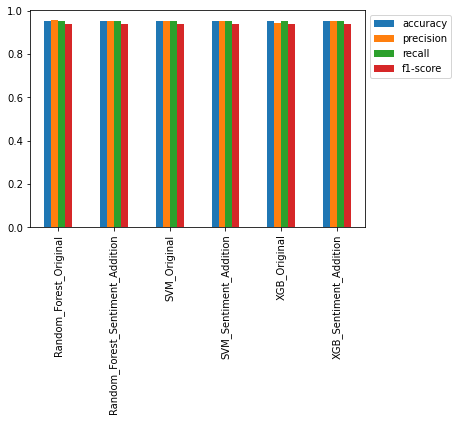

In [150]:
df_compare.plot(kind="bar").legend(bbox_to_anchor=(1.0,1.0));

Now let's compare the models by thier respective **f1-score in descending order**.

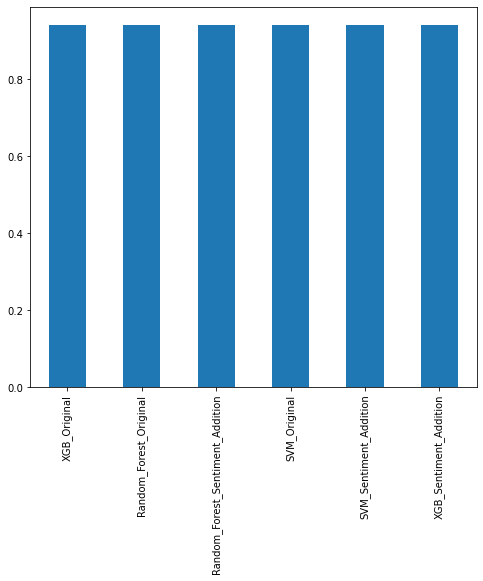

In [151]:
df_compare.sort_values(by="f1-score",ascending=False)["f1-score"].plot(kind="bar",figsize=(8,7));

SO from the above graphs and compare dataframe, we can see that for Random Forest_---------------------------------------- classifier, f1-score has decreased after adding sentiment score but has been increased for Random Forest and XGBoost. But this increase and decrease is **very minimal**, as evidence from dataframe. So, we can **ignore the addition of sentiment score**.   

### Step-10: Applying LSTM and GRU

We will create a functional model using LSTM and GRU. Starting with LSTM. 

#### LSTM
LSTM stands for Long Short Term Memory. It is a type of RNN, generally used for sequence data. <br/>
Since we have already created TextVectorization in step-7, we will not create TextVectroization layer. However, we wil make Embedding layer again as using embedding layer may lead to overfitting.    

In [152]:
import tensorflow as tf

In [153]:
# Check the text vectorization layer on random sentence
random_sentence = random.choice(train_sentences)
print(f"Original text is: {random_sentence}")
print(f"Vectorized text is: {text_vectorizer(random_sentence)}")

Original text is: the thick edge makes it easier to read than the voyage and pw. very fast and responsive. i wish the devise was longer then it would feel more like a real book rather than a cd case
Vectorized text is: [   2 1302 1930  201    5  253    3   79   78    2  394    4 3439   28
  222    4  629    6  239    2 4367   22  637  212    5   50  481   54
   43    8  630  195  697   78    8 4574  174    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]


Checking the properties of text vectorizer.

In [154]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 50000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 79,
 'pad_to_max_tokens': False}

Now make the embedding sentence. Embedding sentence respresents a relationship between words.

In [155]:
embedding_LSTM = tf.keras.layers.Embedding(input_dim=50000,
                                          output_dim=128,
                                          input_length=79)

print(f"Original Sentence is: {random_sentence}")
print(f"Embedded sentence is: \n {embedding_LSTM(text_vectorizer(random_sentence))}")

Original Sentence is: the thick edge makes it easier to read than the voyage and pw. very fast and responsive. i wish the devise was longer then it would feel more like a real book rather than a cd case
Embedded sentence is: 
 [[ 0.02098005 -0.0127692  -0.01571959 ...  0.00771549 -0.04647889
   0.04741711]
 [-0.03406601 -0.01143591 -0.04940641 ... -0.04636821  0.04063029
   0.01616884]
 [-0.0059791  -0.01885512  0.00950496 ... -0.01303685  0.00233817
   0.02521623]
 ...
 [ 0.02402308 -0.01606181  0.00692506 ... -0.02379112 -0.02406944
  -0.01556461]
 [ 0.02402308 -0.01606181  0.00692506 ... -0.02379112 -0.02406944
  -0.01556461]
 [ 0.02402308 -0.01606181  0.00692506 ... -0.02379112 -0.02406944
  -0.01556461]]


In [156]:
# Make the model
inputs = tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding_LSTM(x)
x = tf.keras.layers.LSTM(units=64,activation="tanh",dropout=0.2)(x)
x = tf.keras.layers.Dense(64,activation="relu")(x)
x = tf.keras.layers.Dense(32,activation="relu")(x)
outputs = tf.keras.layers.Dense(3,activation="softmax")(x)
model_LSTM = tf.keras.Model(inputs=inputs,
                           outputs=outputs)

This time fitting rather directly the data into neural net model, we will opt for `tf.data.Dataset` for faster processing and run the data. Generally what happens without prefetching, CPU prepares the data, then GPU use it, at this time CPU is idle. And when GPU finsih processing, then CPU begins to prepare the data and GPU becomes idle. Let's use prefetching for making <b>GPU and CPU working simultaneously</b>.     

In [157]:
 # Let's check the GPU 
!nvidia-smi -L

GPU 0: NVIDIA GeForce GTX 1650 (UUID: GPU-c1e96ebf-e420-9d22-11ad-04113f0e117b)


Before making the data into `tf.data.Datasets`, let's convert our output column in onehot format.

In [158]:
train_label_2D = train_label.reshape(-1,1)
train_label_2D[:5]

array([[2],
       [2],
       [2],
       [2],
       [2]])

In [159]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(sparse=False)
train_label_one_hot = one_hot.fit_transform(train_label_2D)
train_label_one_hot[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [160]:
test_label_2D = test_label.reshape(-1,1)

In [161]:
val_label_one_hot = one_hot.transform(test_label_2D)
val_label_one_hot[:5]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [162]:
# Now for the faster processing of data turn the dataset into `tf.data.Dataset`
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences,train_label_one_hot))
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((test_sentences,val_label_one_hot))
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [163]:
train_dataset, val_dataset

(<PrefetchDataset shapes: ((None,), (None, 3)), types: (tf.string, tf.float64)>,
 <PrefetchDataset shapes: ((None,), (None, 3)), types: (tf.string, tf.float64)>)

In [164]:
len(train_dataset), len(val_dataset)

(100, 25)

Now as the data is in `tf.data.Dataset` format, let's fit the model.

In [165]:
# Compile the model
model_LSTM.compile(loss="categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

In [166]:
# fit the model 
history_lstm = model_LSTM.fit(train_dataset,
                             epochs=100,
                             steps_per_epoch=len(train_dataset),
                             validation_data=(val_dataset),
                             validation_steps=len(val_dataset),
                             callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                         patience=10,
                                                                         restore_best_weights=True)])

Epoch 1/100
100/100 [==============================] - 6s 19ms/step - loss: 0.3755 - accuracy: 0.9194 - val_loss: 0.2654 - val_accuracy: 0.9388
Epoch 2/100
100/100 [==============================] - 1s 13ms/step - loss: 0.2742 - accuracy: 0.9369 - val_loss: 0.2601 - val_accuracy: 0.9388
Epoch 3/100
100/100 [==============================] - 1s 13ms/step - loss: 0.2603 - accuracy: 0.9397 - val_loss: 0.2501 - val_accuracy: 0.9438
Epoch 4/100
100/100 [==============================] - 1s 13ms/step - loss: 0.2512 - accuracy: 0.9425 - val_loss: 0.2482 - val_accuracy: 0.9438
Epoch 5/100
100/100 [==============================] - 1s 13ms/step - loss: 0.2481 - accuracy: 0.9438 - val_loss: 0.2478 - val_accuracy: 0.9413
Epoch 6/100
100/100 [==============================] - 1s 13ms/step - loss: 0.2615 - accuracy: 0.9384 - val_loss: 0.2512 - val_accuracy: 0.9425
Epoch 7/100
100/100 [==============================] - 1s 12ms/step - loss: 0.2475 - accuracy: 0.9441 - val_loss: 0.2552 - val_accuracy:

In [167]:
# Evaluate on the whole model
model_LSTM.evaluate(val_dataset)

25/25 [==============================] - 0s 4ms/step - loss: 0.2428 - accuracy: 0.9425


[0.2427835315465927, 0.9424999952316284]

In [168]:
model_LSTM_pred_prob = model_LSTM.predict(val_dataset)
model_LSTM_pred_prob[:5]

array([[0.01075898, 0.02816232, 0.9610787 ],
       [0.01076192, 0.02817377, 0.96106434],
       [0.01075891, 0.02816205, 0.961079  ],
       [0.01075898, 0.02816229, 0.9610787 ],
       [0.01075898, 0.02816234, 0.9610787 ]], dtype=float32)

In [169]:
model_LSTM_pred = tf.argmax(model_LSTM_pred_prob,axis=1)
model_LSTM_pred.numpy()[:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [170]:
model_LSTM_result = result(y_true=test_label,
                          y_pred=model_LSTM_pred)
model_LSTM_result

{'accuracy': 0.9425,
 'precision': 0.9198417721518988,
 'recall': 0.9425,
 'f1-score': 0.9229492604140838}

#### Implementing GRU

In [171]:
embedding_GRU = tf.keras.layers.Embedding(input_dim=50000,
                                          output_dim=128,
                                          input_length=79)

In [172]:
# Make the model
inputs = tf.keras.layers.Input(shape=(1,),dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding_LSTM(x)
x = tf.keras.layers.GRU(units=64,activation="tanh",dropout=0.2)(x)
x = tf.keras.layers.Dense(64,activation="relu")(x)
x = tf.keras.layers.Dense(32,activation="relu")(x)
outputs = tf.keras.layers.Dense(3,activation="softmax")(x)
model_GRU = tf.keras.Model(inputs=inputs,
                           outputs=outputs)

In [173]:
# Compile the model
model_GRU.compile(loss="categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])

In [174]:
# fit the model 
history_GRU = model_GRU.fit(train_dataset,
                             epochs=100,
                             steps_per_epoch=len(train_dataset),
                             validation_data=(val_dataset),
                             validation_steps=len(val_dataset),
                             callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                                         patience=10,
                                                                         restore_best_weights=True)])

Epoch 1/100
100/100 [==============================] - 3s 17ms/step - loss: 0.3469 - accuracy: 0.9328 - val_loss: 0.2498 - val_accuracy: 0.9413
Epoch 2/100
100/100 [==============================] - 1s 12ms/step - loss: 0.2535 - accuracy: 0.9425 - val_loss: 0.2427 - val_accuracy: 0.9463
Epoch 3/100
100/100 [==============================] - 1s 12ms/step - loss: 0.2446 - accuracy: 0.9472 - val_loss: 0.2412 - val_accuracy: 0.9463
Epoch 4/100
100/100 [==============================] - 1s 12ms/step - loss: 0.2191 - accuracy: 0.9500 - val_loss: 0.2368 - val_accuracy: 0.9450
Epoch 5/100
100/100 [==============================] - 1s 12ms/step - loss: 0.1540 - accuracy: 0.9553 - val_loss: 0.2124 - val_accuracy: 0.9438
Epoch 6/100
100/100 [==============================] - 1s 12ms/step - loss: 0.1052 - accuracy: 0.9597 - val_loss: 0.2371 - val_accuracy: 0.9488
Epoch 7/100
100/100 [==============================] - 1s 13ms/step - loss: 0.0685 - accuracy: 0.9747 - val_loss: 0.2886 - val_accuracy:

In [175]:
model_GRU_pred_prob = model_GRU.predict(val_dataset)
model_GRU_pred_prob[:5]

array([[6.5709963e-03, 3.5006154e-02, 9.5842278e-01],
       [2.6728740e-04, 3.7747219e-03, 9.9595803e-01],
       [1.1197078e-03, 1.0165009e-02, 9.8871523e-01],
       [1.8211352e-04, 2.8255577e-03, 9.9699235e-01],
       [4.5614687e-04, 5.3748856e-03, 9.9416900e-01]], dtype=float32)

In [176]:
model_GRU_pred = tf.argmax(model_GRU_pred_prob,axis=1)
model_GRU_pred.numpy()[:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [177]:
model_GRU_result = result(y_true=test_label,
                          y_pred=model_GRU_pred)
model_GRU_result

{'accuracy': 0.94375,
 'precision': 0.9240755541346973,
 'recall': 0.94375,
 'f1-score': 0.9296958148796649}

### Step-11: Compare the result from the other model.

In [178]:
df_results = pd.DataFrame({"Model_0_NaiveBayes":naive_results,
                          "Model_1_oversample_random_forest":result_smote,
                          "Model_2_under_sample_random_forest":result_nearmiss,
                          "Model_3_Random_Forest_Normal":result_rf_0,
                          "Model_4_xgb_balalnced":result_xgb_balanced,
                          "Model_5_svm_balanced":svm_result,
                          "Model_6_neural_nets_ANN": model_ann_result,
                          "Model_7_Ensemble":ensemble_result_2,
                          "Model_8_LSTM":model_LSTM_result,
                          "Model_9_GRU":model_GRU_result})
df_results = df_results.transpose() 

In [179]:
df_results

,accuracy,precision,recall,f1-score
Model_0_NaiveBayes,0.93875,0.881252,0.93875,0.909093
Model_1_oversample_random_forest,0.95500,0.957058,0.95500,0.941009
Model_2_under_sample_random_forest,0.69125,0.926610,0.69125,0.777543
Model_3_Random_Forest_Normal,0.95500,0.957058,0.95500,0.941009
Model_4_xgb_balalnced,0.95250,0.943534,0.95250,0.941063
Model_5_svm_balanced,0.95375,0.950575,0.95375,0.940085
Model_6_neural_nets_ANN,0.94125,0.895949,0.94125,0.917282
Model_7_Ensemble,0.83625,0.930580,0.83625,0.874883
Model_8_LSTM,0.94250,0.919842,0.94250,0.922949
Model_9_GRU,0.94375,0.924076,0.94375,0.929696


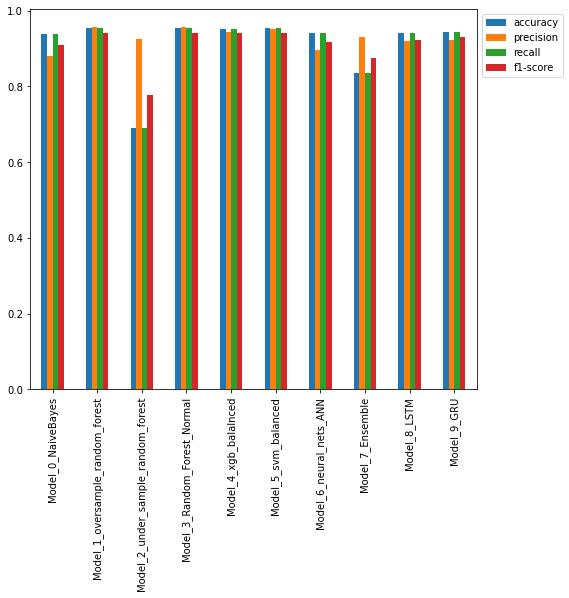

In [180]:
# Let's see the data result
df_results.plot(kind="bar",figsize=(8,7)).legend(bbox_to_anchor=(1.0,1.0));

Let's compare them by f1-score.

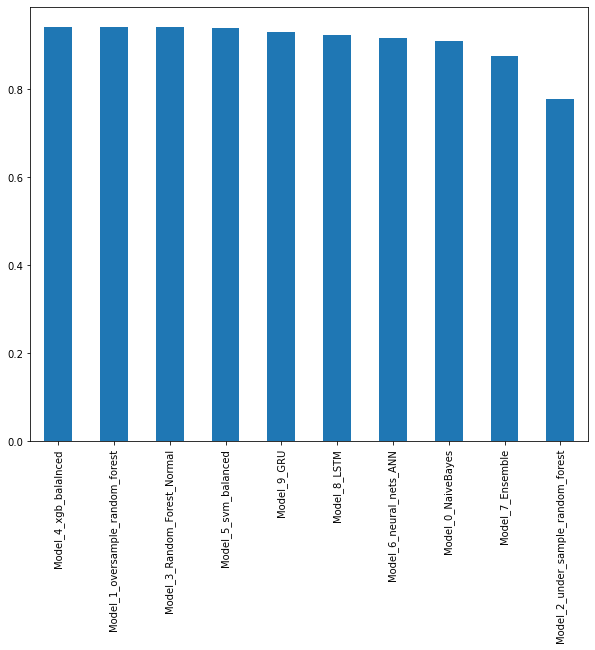

In [181]:
df_results.sort_values(by="f1-score",ascending=False)["f1-score"].plot(kind="bar",figsize=(10,8));

So some Machine Learning models have performed better than LSTM and GRU.

### Step-12: Applying RandomizedCV search on the model.

Let's use Randomized Search CV to improve the accuracy.

In [182]:
random_grid = {"units": [16,32,64,128],
               "activation": ["tanh","relu"],
               "kernel_initializer": ["glorot_uniform","he_normal","he_uniform"],
               "dropout":[0.1,0.2,0.3,0.4,0.5],
               "recurrent_dropout":[0.1,0.2,0.3,0.4,0.5],
               "return_sequences":[True,False],
               "return_state":[True,False],
               "stateful":[True,False]
}

In [183]:
# Make the model
def create_model(units=64,activation="relu",kernel_initializer="glorot_uniform",dropout=0.2,recurrent_dropout=0.2,
                 return_sequences=False,return_state=False,stateful=False):
    inputs = tf.keras.layers.Input(shape=(1,),dtype=tf.string)
    x = text_vectorizer(inputs)
    x = embedding_LSTM(x)
    x = tf.keras.layers.LSTM(units=units,activation=activation,kernel_initializer=kernel_initializer,dropout=dropout,recurrent_dropout=recurrent_dropout,
                            return_sequences=return_sequences,return_state=return_state,stateful=stateful)(x)
    x = tf.keras.layers.Dense(64,"relu")(x)
    x = tf.keras.layers.Dense(32,"relu")(x)
    outputs = tf.keras.layers.Dense(3,"softmax")(x)
    model_LSTM_random = tf.keras.Model(inputs=inputs,
                           outputs=outputs)
    
    model_LSTM_random.compile(loss="categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])
    
    return model_LSTM_random

In [184]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [185]:
model_random_LSTM = KerasClassifier(build_fn=create_model, verbose=0)

In [186]:
from sklearn.model_selection import RandomizedSearchCV

In [187]:
grid_random = RandomizedSearchCV(estimator=model_random_LSTM,param_distributions=random_grid,cv=4)

In [189]:
grid_random_result = grid_random.fit(train_sentences,train_label)

<i> Note: </i> We are getting above warning because there are certain requirements for cuDNN implementaion. If any of the requirements doesn't meet it shows the warning, as we get. Since, during RandomizedSearchCV not all the criterion are going to met that's why we have got this error. 

The requirements to use the cuDNN implementation are: <br/>
<i>
activation == tanh <br/>
recurrent_activation == sigmoid <br/>
recurrent_dropout == 0 <br/>
unroll is False <br/>
use_bias is True <br/>
Inputs, if use masking, are strictly right-padded. <br/>
Eager execution is enabled in the outermost context. <br/> </i>

In [190]:
print("Best: %f using %s" % (grid_random_result.best_score_, grid_random_result.best_params_))

Best: 0.936875 using {'units': 64, 'stateful': False, 'return_state': False, 'return_sequences': False, 'recurrent_dropout': 0.3, 'kernel_initializer': 'he_uniform', 'dropout': 0.3, 'activation': 'relu'}


Let's fit the model using these parameters and check accuracy.

In [191]:
model_LSTM_best = create_model(units=16,activation="tanh",kernel_initializer="glorot_uniform",dropout=0.1,recurrent_dropout=0.3,return_sequences=False,return_state=False,
                              stateful=False)

In [192]:
model_LSTM_best.fit(train_dataset,
                             epochs=100,
                             steps_per_epoch=len(train_dataset),
                             validation_data=(val_dataset),
                             validation_steps=len(val_dataset),
                             callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", # this time take accuracy as parameter
                                                                         patience=10,
                                                                         restore_best_weights=True)])

Epoch 1/100
100/100 [==============================] - 66s 623ms/step - loss: 0.4322 - accuracy: 0.9184 - val_loss: 0.2510 - val_accuracy: 0.9388
Epoch 2/100
100/100 [==============================] - 62s 620ms/step - loss: 0.2531 - accuracy: 0.9388 - val_loss: 0.2493 - val_accuracy: 0.9438
Epoch 3/100
100/100 [==============================] - 62s 617ms/step - loss: 0.2466 - accuracy: 0.9434 - val_loss: 0.2469 - val_accuracy: 0.9425
Epoch 4/100
100/100 [==============================] - 60s 602ms/step - loss: 0.2356 - accuracy: 0.9463 - val_loss: 0.2460 - val_accuracy: 0.9425
Epoch 5/100
100/100 [==============================] - 60s 605ms/step - loss: 0.2408 - accuracy: 0.9459 - val_loss: 0.2481 - val_accuracy: 0.9438
Epoch 6/100
100/100 [==============================] - 63s 630ms/step - loss: 0.2359 - accuracy: 0.9484 - val_loss: 0.2490 - val_accuracy: 0.9438
Epoch 7/100
100/100 [==============================] - 60s 600ms/step - loss: 0.2341 - accuracy: 0.9491 - val_loss: 0.2505 -

In [193]:
# Evaluate on the whole model
model_LSTM_best.evaluate(val_dataset)

25/25 [==============================] - 2s 66ms/step - loss: 0.2493 - accuracy: 0.9438


[0.2492946982383728, 0.9437500238418579]

In [194]:
model_LSTM_best_pred_prob = model_LSTM_best.predict(val_dataset)
model_LSTM_best_pred_prob[:5]

array([[0.0166674 , 0.03086902, 0.9524636 ],
       [0.01669215, 0.03090543, 0.9524024 ],
       [0.01666823, 0.03087016, 0.95246166],
       [0.01666695, 0.03086842, 0.9524646 ],
       [0.01666702, 0.0308685 , 0.95246446]], dtype=float32)

In [195]:
model_LSTM_best_pred = tf.argmax(model_LSTM_best_pred_prob,axis=1)
model_LSTM_best_pred.numpy()[:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [196]:
model_LSTM_best_result = result(y_true=test_label,
                          y_pred=model_LSTM_best_pred)
model_LSTM_best_result

{'accuracy': 0.94375,
 'precision': 0.8997940251572326,
 'recall': 0.94375,
 'f1-score': 0.9192548871640075}

Intitailly the f1 score of LSTM was 0.9242605004337328, and after RandomizedSearchCV, f11 score has become 0.926978674287186. Also, accuracy has been improved from 0.945 to 0.9475. 

Now doing the same for GRU.

In [197]:
# Make the model
def create_model_GRU(units=64,activation="relu",kernel_initializer="glorot_uniform",dropout=0.2,recurrent_dropout=0.2,
                 return_sequences=False,return_state=False,stateful=False):
    inputs = tf.keras.layers.Input(shape=(1,),dtype=tf.string)
    x = text_vectorizer(inputs)
    x = embedding_GRU(x)
    x = tf.keras.layers.GRU(units=units,activation=activation,kernel_initializer=kernel_initializer,dropout=dropout,recurrent_dropout=recurrent_dropout,
                            return_sequences=return_sequences,return_state=return_state,stateful=stateful)(x)
    x = tf.keras.layers.Dense(64,"relu")(x)
    x = tf.keras.layers.Dense(32,"relu")(x)
    outputs = tf.keras.layers.Dense(3,"softmax")(x)
    model_GRU_random = tf.keras.Model(inputs=inputs,
                           outputs=outputs)
    
    model_GRU_random.compile(loss="categorical_crossentropy",
             optimizer=tf.keras.optimizers.Adam(),
             metrics=["accuracy"])
    
    return model_GRU_random

In [198]:
model_random_GRU = KerasClassifier(build_fn=create_model_GRU, verbose=0)
grid_random_GRU = RandomizedSearchCV(estimator=model_random_GRU,param_distributions=random_grid,cv=4)
grid_random_GRU_result = grid_random_GRU.fit(train_sentences,train_label)

In [199]:
print("Best: %f using %s" % (grid_random_GRU_result.best_score_, grid_random_GRU_result.best_params_))

Best: 0.936875 using {'units': 64, 'stateful': False, 'return_state': False, 'return_sequences': False, 'recurrent_dropout': 0.5, 'kernel_initializer': 'he_normal', 'dropout': 0.5, 'activation': 'relu'}


Let's fit the model with the given result above.

In [200]:
model_GRU_best = create_model_GRU(units=16,kernel_initializer="he_uniform",dropout=0.4,recurrent_dropout=0.5,return_sequences=False,return_state=False,stateful=False)

In [201]:
model_GRU_best.fit(train_dataset,
                             epochs=100,
                             steps_per_epoch=len(train_dataset),
                             validation_data=(val_dataset),
                             validation_steps=len(val_dataset),
                             callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", 
                                                                         patience=10,
                                                                         restore_best_weights=True)])

Epoch 1/100
100/100 [==============================] - 36s 332ms/step - loss: 0.4292 - accuracy: 0.9075 - val_loss: 0.2577 - val_accuracy: 0.9388
Epoch 2/100
100/100 [==============================] - 35s 352ms/step - loss: 0.2668 - accuracy: 0.9369 - val_loss: 0.2553 - val_accuracy: 0.9388
Epoch 3/100
100/100 [==============================] - 34s 337ms/step - loss: 0.2629 - accuracy: 0.9369 - val_loss: 0.2525 - val_accuracy: 0.9400
Epoch 4/100
100/100 [==============================] - 35s 345ms/step - loss: 0.2595 - accuracy: 0.9409 - val_loss: 0.2508 - val_accuracy: 0.9425
Epoch 5/100
100/100 [==============================] - 34s 340ms/step - loss: 0.2528 - accuracy: 0.9425 - val_loss: 0.2488 - val_accuracy: 0.9425
Epoch 6/100
100/100 [==============================] - 36s 355ms/step - loss: 0.2476 - accuracy: 0.9428 - val_loss: 0.2502 - val_accuracy: 0.9413
Epoch 7/100
100/100 [==============================] - 34s 345ms/step - loss: 0.2339 - accuracy: 0.9450 - val_loss: 0.2440 -

In [202]:
model_GRU_best_pred_prob = model_GRU_best.predict(val_dataset)
model_GRU_best_pred_prob[:5]


array([[0.0157221 , 0.03058345, 0.95369446],
       [0.01572244, 0.03058405, 0.9536935 ],
       [0.0157221 , 0.03058346, 0.95369446],
       [0.0157221 , 0.03058347, 0.95369446],
       [0.0157221 , 0.03058347, 0.95369446]], dtype=float32)

In [203]:
model_GRU_best_pred = tf.argmax(model_GRU_best_pred_prob,axis=1)
model_LSTM_best_pred.numpy()[:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [204]:
model_GRU_best_result = result(y_true=test_label,
                          y_pred=model_GRU_best_pred)
model_GRU_best_result

{'accuracy': 0.9425,
 'precision': 0.8965440251572326,
 'recall': 0.9425,
 'f1-score': 0.9174493316084519}

So, now we have got the best version of both LSTM as well as GRU.

### Step-13: Cluster similar reviews.

We will do cluster similar reviews and topic modeling  with the help of LDA module of gensim library. First task is to clean the sentences from any punctuation, stop words and then lemmatize the word. 

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
stop = set(stopwords.words('english')) # for removing stopwords
exclude = set(string.punctuation)   # for removing punctuations
lemma = WordNetLemmatizer()  # for lemmatization
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [ ]:
sentences = [text for text in df_train["reviews.text"]]

In [ ]:
sentences[:5]

In [ ]:
# applying this function to compiled "doc" file
doc_clean = [clean(doc).split() for doc in sentences]

In [ ]:
doc_clean[0][:5]

Now we will use gensim library to create the term dictionary of our corpus, where every unique term is assigned as index.

In [ ]:
import gensim
from gensim import corpora

In [ ]:
print(gensim.__version__)

In [ ]:
# creating the term dictionary of our corpus, where every unique term is assigned as index
dictionary = corpora.Dictionary(doc_clean)

Next we will use `doc2bow` function to convert into Document Term Matrix using dictionary prepared above.

In [ ]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [ ]:
doc_term_matrix[0][:5]

Since now we have converted data into document term matrix, now we can apply LDA model on it. Converting into document term matrix is LDA prerequisite.  

In [ ]:
# creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

In [ ]:
lda_model = Lda(corpus=doc_term_matrix,num_topics=10,id2word=dictionary,passes=20,alpha='auto',per_word_topics=True)

In [ ]:
lda_model.print_topics(num_topics=10,num_words=10)

The first sentence above <br/> <i> '0.058*"easy" + 0.057*"love" + 0.049*"it" + 0.045*"use" + 0.035*"bought" + 0.026*"gift" + 0.026*"tablet" + 0.022*"old" + 0.021*"great" + 0.018*"year" </i> <br/> could be undrstood as, top 10 keywords that contribute to this topic are: <i> easy, love, etc. </i> and weight of <i> easy </i> on this topic is 0.058 and love is 0.057.  

In [ ]:
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [ ]:
# Computing the Perplexity
print('Perplexity: ', lda_model.log_perplexity(doc_term_matrix))  # a measure of how good the model is. lower the better.

# Computing the Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix, texts=doc_clean):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=doc_term_matrix, texts=sentences)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Let's view the top keywords of sentences.

In [ ]:
df_dominant_topic["Keywords"].value_counts()

There are 10 words for every document. Let's visualize this and see we can come up with a better short name. Though, it is not possible to come up with exact name which will accurately fit all the sentences in this cluster, but it will capture the essence. 

In [ ]:
df_dominant_topic.loc[df_dominant_topic["Keywords"]=="easy, love, it, use, bought, gift, tablet, old, great, year"]["Text"]

So, thise group of data mostly talk about gifts. We will keep such sentences under gift categories. <br/>
Similarly doing for 2nd category: <i> "echo, great, alexa, music, love, amazon, home, use, show, work" </i>. 

In [ ]:
df_dominant_topic.loc[df_dominant_topic["Keywords"]=="echo, great, alexa, music, love, amazon, home, use, show, work"]["Text"]

It looks like, it talk about Alexa Music. Similarly viewing others and come up with shorrt description.

We have come up with this final list after performing on all the 10 rows.

<i> 1) Gift 2) Alexa: Music,Home 3) Tablets: storage,need & parental control  4) Kindle: Battery performance and life 5) Tablet: Price & Bettery 6) Alexa: Speaker, Tablet: Screen 7) Kindle: Easy reading,use. 8) Alexa: Echo sound,music 9) Tablet: Performance and price 10) Alexa: Fun & Price   </i>

Let's fit this on dataframe.

In [ ]:
df_dominant_topic["Keywords"].value_counts()

In [ ]:
df_dominant_topic["Topic"] = df_dominant_topic["Keywords"].map({
    "easy, love, it, use, bought, gift, tablet, old, great, year" : 0,
    "echo, great, alexa, music, love, amazon, home, use, show, work" : 1,
    "tablet, kid, game, great, apps, play, time, year, old, love" : 2,
    "kindle, battery, fire, amazon, screen, would, life, much, tablet, read" : 3,
    "love, great, recommend, tablet, would, it, price, work, kid, bought" : 4,
    "good, great, sound, price, quality, picture, screen, tablet, product, love" : 5,
    "book, reading, great, one, kindle, happy, good, im, product, read" : 6,
    "alexa, show, screen, echo, video, music, love, like, home, see" : 7,
    "book, use, read, tablet, love, far, go, get, it, great"  : 8,
    "echo, one, device, video, would, amazon, like, time, dot, better" : 9
    })

In [ ]:
df_dominant_topic.head()

In [ ]:
df_dominant_topic["Topic"] = df_dominant_topic["Topic"].map({0: "Gift",
                                                             1: "Alexa: Music,Home",
                                                             2: "Tablets: storage,need & parental control",
                                                             3: "Kindle: Battery performance and life",
                                                             4: "Tablet: Price & Bettery",
                                                             5: "Alexa: Speaker, Tablet: Screen",
                                                             6: "Kindle: Easy reading,use",
                                                             7: "Alexa: Echo sound,music",
                                                             8: "Tablet: Performance and price",
                                                             9: "Alexa: Fun & Price"}) 

In [ ]:
df_dominant_topic.head()

In [ ]:
df_train.rename(columns={"reviews.text":"Text","sentiment":"Sentiment"},inplace=True)

Now let's merge this two dataframe to create a better visual understanding.

In [ ]:
df_final = pd.merge(df_dominant_topic,df_train,on="Text",how="left")

In [ ]:
df_final.head(3)

Let's make this dataframe simpler and east to read.

In [ ]:
df_final.drop(columns={"Document_No","Dominant_Topic","name","brand","categories",
                       "primaryCategories","reviews.date","reviews.title"},axis=1,inplace=True)

In [ ]:
df_final.tail()

This above is our <b>final dataframe</b>.

Let's see make some prediction on our test data. We will use RandomForest model which was used on balanced dataset for this purpose, as it got the highest `f1-score` among all the models.

In [ ]:
test_df = pd.read_csv("test_data_hidden.csv")
test_df.head()

In [ ]:
test_sent = test_df["reviews.text"]

In [ ]:
model_rf.predict(test_sent)